# Asignación de velocidades a la red segun horario

En este codigo se asignaran las velocidades a la red segun el horario pico o valle

## Necesarios
* Red de infraestructura original modificada
* Librerias instaladas en especial Geopandas
* Velocidades calibradas

In [6]:
#importar librerias
import geopandas as gpd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
# Importar otra libreria para hacer los buffer
from shapely import speedups
speedups.disable()

## Carro

In [8]:
#Se carga la red a trabajar
red_actual_veh = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_inf_vial/Red_Base_Modo/Red_Inf_AS.shp")

red_actual_veh = red_actual_veh.drop(['ID_JER', 'VEL_FUN_PR', 'ONEWAY', 'x1', 'y1', 'x2', 
                                      'y2', 'xm', 'ym', 'z1', 'z2'], axis=1)

In [9]:
#Se corrijen los nombres de la jerarquia para no afectar los calculos
for i in range(0, len(red_actual_veh)):
    if  (red_actual_veh.loc[i,'JER_PMMEP'] == "Arterial Primaria"):
        red_actual_veh.loc[i,'JER_PMMEP']="Malla víal arterial primaria"
    elif (red_actual_veh.loc[i,'JER_PMMEP'] == "Malla vía arterial primaria"):
        red_actual_veh.loc[i,'JER_PMMEP']="Malla víal arterial primaria"
    elif (red_actual_veh.loc[i,'JER_PMMEP'] == "Arterial secundaria"):
        red_actual_veh.loc[i,'JER_PMMEP']="Malla víal arterial secundari"
    elif (red_actual_veh.loc[i,'JER_PMMEP'] == "Malla vía arterial secundari"):
        red_actual_veh.loc[i,'JER_PMMEP']="Malla víal arterial secundari"
    elif (red_actual_veh.loc[i,'JER_PMMEP'] == "Local primaria"):
        red_actual_veh.loc[i,'JER_PMMEP']="Malla víal local"

(974740.0, 992760.0)

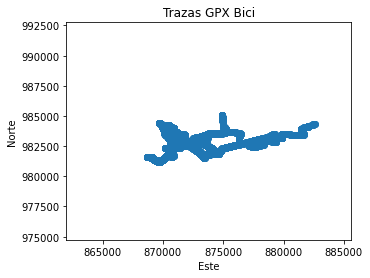

In [302]:
#Se cargan las velocidades a trabajar
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/PuntosVelocidades/p_vel_orig_ang/Carro.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/picovalle/carro_pv1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/picovalle/moto_pv1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/picovalle/pico2.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/franjas/Carro.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/TPC/Pico1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Bici/Pico1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/franjas/Bici2.shp")
#velocidades = gpd.read_file("C:/Users/user/Desktop/Tesis/VelocidadesPMMEP/shapes_fin/Bici.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Bici/Valle3.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/franjas/Bici.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Carro/Pico1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Carro/Valle2.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Moto/Pico1.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Moto/Valle2.shp")
velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/TPC/Valle2.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Carro/Valle3.shp")
#velocidades = gpd.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/comparacion/Carro/Valle4.shp")
velocidades.plot()
plt.xlabel('Este')
plt.ylabel('Norte')
plt.title('Trazas GPX Bici')
# Set axes

plt.xlim(862000, 885600)
plt.ylim(974740, 992760)

In [303]:
#Se cambia la zona a magna sirgas bogota
red_actual_veh.to_crs("EPSG:3116", inplace = True)
velocidades.to_crs("EPSG:3116", inplace = True)

In [304]:
#se revisan las columnas de velocidades
velocidades.head(2)

,file,ID,altura,velocity_m,velocity_k,timestamp,latitud,longitud,tiempo,angulo_vel,sec,min,hr,pico_valle,geometry
0,15 2015-10-02_09-00_vie - Julieth.gpx,1499,1224.0,5.840414,21.025491,2015-10-02 12:45:03,4.439713,-75.218490,12:45:03,122.671018,45903,765.050000,12.750833,valle2,POINT (873348.638 982796.314)
1,15 2015-10-02_09-00_vie - Julieth.gpx,1500,1225.0,6.654457,23.956045,2015-10-02 12:45:05,4.439625,-75.218407,12:45:05,128.387850,45905,765.083333,12.751389,valle2,POINT (873361.319 982788.182)


In [305]:
#Se eliminan las columnas que puedan tener datos NaN
#velocidades = velocidades.drop(['A0', 'slope'], axis=1)

In [306]:
#se revisan las columnas de la red
red_actual_veh.columns

Index(['DIR', 'NOMENCLATU', 'CATEGORIA', 'NOMEN', 'JER_POT', 'JER_PMMEP',
       'Long_KM', 'Shape_Leng', 'angulo1', 'angulo2', 'slope', 'geometry',
       'FID', 'velocity_k_x', 'velocity_k_y', 'velocity_k_x', 'velocity_k_y',
       'velocity_k_x', 'velocity_k_y', 'velocity_k_x', 'velocity_k_y'],
      dtype='object')

In [307]:
#Se crea una columna con el FID para poder concatenar
red_actual_veh["FID"] = range(0, len(red_actual_veh))

In [308]:
#Se crea un buffer de la red de 15 metros este se puede modificar el ancho a antojo
buffer = red_actual_veh.buffer(15)

In [309]:
#se toma solo la columna de geometria
buffer = gpd.GeoDataFrame(red_actual_veh.drop("geometry", axis = 1), geometry = buffer)

<AxesSubplot:>

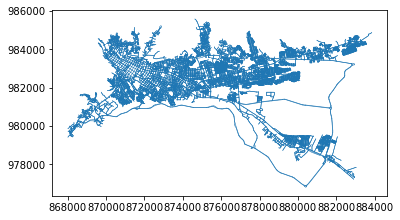

In [310]:
#Se visualiza el plot
buffer.plot()

In [311]:
#Se crea una tabla unicamente con la información necesaria
buffer_int = buffer[["JER_PMMEP", "angulo1", 
                     "angulo2","slope", "geometry", "FID"]]

In [312]:
#Se visualiza la tabla
buffer_int.head()

,JER_PMMEP,angulo1,angulo2,slope,geometry,FID
0,Malla vía local,36.123963,36.445994,1.828875,"POLYGON ((871463.827 982528.684, 871463.927 98...",0
1,Malla víal arterial primaria,199.524533,216.501489,-4.077699,"POLYGON ((871518.385 982628.996, 871516.721 98...",1
2,Colectoras,302.580455,303.041108,4.033832,"POLYGON ((871516.434 982792.779, 871445.125 98...",2
3,Malla víal arterial secundari,114.747128,114.807639,-5.290759,"POLYGON ((871442.258 983055.914, 871442.361 98...",3
4,Malla víal arterial primaria,117.520102,118.003455,-2.102832,"POLYGON ((871438.628 983207.228, 871438.810 98...",4


In [313]:
#Si las velocidades son de strava se revisa el ID si no es así no es necesario
#velocidades["ID_Strava"] = velocidades.ID

In [314]:
#se realiza una intersección con los datos que esten tocando el buffer
spatial_join = gpd.sjoin(buffer_int, velocidades, how = "left", op = "intersects")
#spatial_join = gpd.sjoin(velocidades, buffer_int, how = "right", op = "intersects")

In [315]:
#Se visualiza la tabla
spatial_join

,JER_PMMEP,angulo1,angulo2,slope,geometry,FID,index_right,file,ID,altura,...,velocity_k,timestamp,latitud,longitud,tiempo,angulo_vel,sec,min,hr,pico_valle
0,Malla vía local,36.123963,36.445994,1.828875,"POLYGON ((871463.827 982528.684, 871463.927 98...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Malla víal arterial primaria,199.524533,216.501489,-4.077699,"POLYGON ((871518.385 982628.996, 871516.721 98...",1,5292.0,20 2015-08-28_07-32_vie - Julieth.gpx,13979.0,1256.00,...,2.806701,2015-08-28 13:04:00,4.437793,-75.235493,13:04:00,209.233676,47040.0,784.000000,13.066667,valle2
1,Malla víal arterial primaria,199.524533,216.501489,-4.077699,"POLYGON ((871518.385 982628.996, 871516.721 98...",1,5290.0,20 2015-08-28_07-32_vie - Julieth.gpx,13974.0,1258.00,...,1.197189,2015-08-28 13:03:52,4.437799,-75.235494,13:03:52,42.591893,47032.0,783.866667,13.064444,valle2
1,Malla víal arterial primaria,199.524533,216.501489,-4.077699,"POLYGON ((871518.385 982628.996, 871516.721 98...",1,5291.0,20 2015-08-28_07-32_vie - Julieth.gpx,13975.0,1257.00,...,1.749954,2015-08-28 13:03:54,4.437806,-75.235489,13:03:54,40.164214,47034.0,783.900000,13.065000,valle2
1,Malla víal arterial primaria,199.524533,216.501489,-4.077699,"POLYGON ((871518.385 982628.996, 871516.721 98...",1,5289.0,20 2015-08-28_07-32_vie - Julieth.gpx,13973.0,1257.00,...,5.302995,2015-08-28 13:03:51,4.437802,-75.235494,13:03:51,217.425912,47031.0,783.850000,13.064167,valle2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27934,Malla vía local,186.866659,186.866659,2.216708,"POLYGON ((878112.685 981243.929, 878112.438 98...",27934,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27935,Malla vía local,6.866659,6.866659,-2.216708,"POLYGON ((878085.258 981267.094, 878085.505 98...",27935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27936,Malla vía local,318.237859,332.560504,3.375973,"POLYGON ((874402.104 981751.950, 874400.691 98...",27936,3113.0,17 2015-08-14_07-06_vie - JuanGuillermo.gpx,7376.0,1175.98,...,37.159263,2015-08-14 13:34:16,4.431120,-75.209184,13:34:16,117.255179,48856.0,814.266667,13.571111,valle2
27936,Malla vía local,318.237859,332.560504,3.375973,"POLYGON ((874402.104 981751.950, 874400.691 98...",27936,3112.0,17 2015-08-14_07-06_vie - JuanGuillermo.gpx,7375.0,1174.98,...,49.259692,2015-08-14 13:34:14,4.431201,-75.209351,13:34:14,115.361749,48854.0,814.233333,13.570556,valle2


In [316]:
#se revisa cuantos puntos quedaron por fuera
spatial_join.isna().sum() 

JER_PMMEP          0
angulo1            0
angulo2            0
slope              0
geometry           0
FID                0
index_right    24782
file           24782
ID             24782
altura         24782
velocity_m     24782
velocity_k     24782
timestamp      24782
latitud        24782
longitud       24782
tiempo         24782
angulo_vel     24782
sec            24782
min            24782
hr             24782
pico_valle     24782
dtype: int64

In [317]:
#Se quitan los puntos que no tomo
spatial_join.dropna(inplace = True)

In [318]:
spatial_join[["angulo1", "angulo2", "angulo_vel"]]

,angulo1,angulo2,angulo_vel
1,199.524533,216.501489,209.233676
1,199.524533,216.501489,42.591893
1,199.524533,216.501489,40.164214
1,199.524533,216.501489,217.425912
1,199.524533,216.501489,219.128025
...,...,...,...
27930,169.878989,165.233660,252.844265
27930,169.878989,165.233660,115.361749
27936,318.237859,332.560504,117.255179
27936,318.237859,332.560504,115.361749


In [319]:
0

0

In [320]:
#Angulos mayores a 331 grados
spatial_join_selection_331a = spatial_join[(spatial_join.angulo1 > 330) & (spatial_join.angulo2 > 330)]
spatial_join_selection_331a = spatial_join_selection_331a[((spatial_join_selection_331a.angulo_vel.between(0, spatial_join_selection_331a.angulo1 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_331a.angulo_vel.between(spatial_join_selection_331a.angulo1 - 30, 360,  
                                                                                                      inclusive = True))) |
                                                       ((spatial_join_selection_331a.angulo_vel.between(0, spatial_join_selection_331a.angulo2 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_331a.angulo_vel.between(spatial_join_selection_331a.angulo2 - 30, 360,  
                                                                                                      inclusive = True)))]
len(spatial_join_selection_331a)

760

In [321]:
#Angulos mayores a 331 grados
spatial_join_selection_331b = spatial_join[(spatial_join.angulo1 > 330) & (spatial_join.angulo2 < 30)]
spatial_join_selection_331b = spatial_join_selection_331b[((spatial_join_selection_331b.angulo_vel.between(0, spatial_join_selection_331b.angulo1 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_331b.angulo_vel.between(spatial_join_selection_331b.angulo1 - 30, 360,  
                                                                                                      inclusive = True))) |
                                                       ((spatial_join_selection_331b.angulo_vel.between(0, spatial_join_selection_331b.angulo2 + 30,  
                                                                                                      inclusive = True)) |
                                                        (spatial_join_selection_331b.angulo_vel.between(spatial_join_selection_331b.angulo2 + 330,
                                                                                                      360, inclusive = True)))]
len(spatial_join_selection_331b)

32

In [322]:
#Angulos mayores a 331 grados
spatial_join_selection_331c = spatial_join[(spatial_join.angulo1 > 330) & ((spatial_join.angulo2 <= 330) & (spatial_join.angulo2 >= 30))]
spatial_join_selection_331c = spatial_join_selection_331c[((spatial_join_selection_331c.angulo_vel.between(0, spatial_join_selection_331c.angulo1 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_331c.angulo_vel.between(spatial_join_selection_331c.angulo1 - 30, 360,  
                                                                                                      inclusive = True))) |
                                                        (spatial_join_selection_331c.angulo_vel.between(spatial_join_selection_331c.angulo2 - 30, 
                                                                                                        spatial_join_selection_331c.angulo2 + 30, 
                                                                                                        inclusive = True))]
len(spatial_join_selection_331c)

120

In [323]:
#Angulos menores a 30 grados
spatial_join_selection_30a = spatial_join[(spatial_join.angulo1 < 30) & (spatial_join.angulo2 > 330)]
spatial_join_selection_30a = spatial_join_selection_30a[((spatial_join_selection_30a.angulo_vel.between(0, spatial_join_selection_30a.angulo1 + 30,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_30a.angulo_vel.between(spatial_join_selection_30a.angulo1 + 330, 360,  
                                                                                                      inclusive = True))) |
                                                       ((spatial_join_selection_30a.angulo_vel.between(0, spatial_join_selection_30a.angulo2 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_30a.angulo_vel.between(spatial_join_selection_30a.angulo2 - 30, 360,  
                                                                                                      inclusive = True)))]
len(spatial_join_selection_30a)

37

In [324]:
#Angulos menores a 30 grados
spatial_join_selection_30b = spatial_join[(spatial_join.angulo1 < 30) & (spatial_join.angulo2 < 30)]
spatial_join_selection_30b = spatial_join_selection_30b[((spatial_join_selection_30b.angulo_vel.between(0, spatial_join_selection_30b.angulo1 + 30,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_30b.angulo_vel.between(spatial_join_selection_30b.angulo1 + 330, 360,  
                                                                                                      inclusive = True))) |
                                                       ((spatial_join_selection_30b.angulo_vel.between(0, spatial_join_selection_30b.angulo2 + 30,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_30b.angulo_vel.between(spatial_join_selection_30b.angulo2 + 330, 360,  
                                                                                                      inclusive = True)))]
len(spatial_join_selection_30b)

506

In [325]:
#Angulos menores a 30 grados
spatial_join_selection_30c = spatial_join[(spatial_join.angulo1 < 30) & ((spatial_join.angulo2 <= 330) & (spatial_join.angulo2 >= 30))]
spatial_join_selection_30c = spatial_join_selection_30c[((spatial_join_selection_30c.angulo_vel.between(0, spatial_join_selection_30c.angulo1 + 30,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_30c.angulo_vel.between(spatial_join_selection_30c.angulo1 + 330, 360,  
                                                                                                      inclusive = True))) |
                                                        (spatial_join_selection_30c.angulo_vel.between(spatial_join_selection_30c.angulo2 - 30, 
                                                                                                        spatial_join_selection_30c.angulo2 + 30, 
                                                                                                        inclusive = True))]
len(spatial_join_selection_30c)

77

In [326]:
#Resto
spatial_join_selection_Ra = spatial_join[((spatial_join.angulo1 >= 30) & (spatial_join.angulo1 <= 330)) & (spatial_join.angulo2 > 330)]
spatial_join_selection_Ra = spatial_join_selection_Ra[(spatial_join_selection_Ra.angulo_vel.between(spatial_join_selection_Ra.angulo1 - 30, 
                                                                                                 spatial_join_selection_Ra.angulo1 + 30, 
                                                                                                 inclusive = True)) |
                                                        ((spatial_join_selection_Ra.angulo_vel.between(0, spatial_join_selection_Ra.angulo2 - 330,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_Ra.angulo_vel.between(spatial_join_selection_Ra.angulo2 - 30, 360,  
                                                                                                      inclusive = True)))]
len(spatial_join_selection_Ra)

15

In [327]:
#Resto
spatial_join_selection_Rb = spatial_join[((spatial_join.angulo1 >= 30) & (spatial_join.angulo1 <= 330)) & (spatial_join.angulo2 < 30)]
spatial_join_selection_Rb = spatial_join_selection_Rb[(spatial_join_selection_Rb.angulo_vel.between(spatial_join_selection_Rb.angulo1 - 30, 
                                                                                                 spatial_join_selection_Rb.angulo1 + 30, 
                                                                                                 inclusive = True)) |
                                                        ((spatial_join_selection_Rb.angulo_vel.between(0, spatial_join_selection_Rb.angulo2 + 30,  
                                                                                                      inclusive = True)) | 
                                                        (spatial_join_selection_Rb.angulo_vel.between(spatial_join_selection_Rb.angulo2 + 330, 360,  
                                                                                                      inclusive = True)))]
len(spatial_join_selection_Rb)

34

In [328]:
#Resto
spatial_join_selection_Rc = spatial_join[((spatial_join.angulo1 >= 30) & (spatial_join.angulo1 <= 330)) & ((spatial_join.angulo2 <= 330) & (spatial_join.angulo2 >= 30))]
spatial_join_selection_Rc = spatial_join_selection_Rc[(spatial_join_selection_Rc.angulo_vel.between(spatial_join_selection_Rc.angulo1 - 30, 
                                                                                                 spatial_join_selection_Rc.angulo1 + 30, 
                                                                                                 inclusive = True)) |
                                                        (spatial_join_selection_Rc.angulo_vel.between(spatial_join_selection_Rc.angulo2 - 30, 
                                                                                                        spatial_join_selection_Rc.angulo2 + 30, 
                                                                                                        inclusive = True))]
len(spatial_join_selection_Rc)

13027

In [329]:
spatial_join_final = pd.concat([spatial_join_selection_331a, spatial_join_selection_331b, spatial_join_selection_331c, 
                                spatial_join_selection_30a, spatial_join_selection_30b, spatial_join_selection_30c, 
                                spatial_join_selection_Ra, spatial_join_selection_Rb, spatial_join_selection_Rc], axis = 0)

In [330]:
len(spatial_join_final)

14608

In [331]:
spatial_join_final.columns

Index(['JER_PMMEP', 'angulo1', 'angulo2', 'slope', 'geometry', 'FID',
       'index_right', 'file', 'ID', 'altura', 'velocity_m', 'velocity_k',
       'timestamp', 'latitud', 'longitud', 'tiempo', 'angulo_vel', 'sec',
       'min', 'hr', 'pico_valle'],
      dtype='object')

In [332]:
#velocidad_modo = spatial_join_final.groupby(['FID', 'pico_valle'])["velocity_k"].mean().reset_index()
velocidad_modo = spatial_join_final.groupby(['FID'])["velocity_k"].mean().reset_index()

In [333]:
velocidad_modo.columns

Index(['FID', 'velocity_k'], dtype='object')

In [334]:
len(velocidad_modo)

1286

In [335]:
len(red_actual_veh)

27937

In [336]:
red_actual_veh = pd.merge(red_actual_veh, velocidad_modo, on = "FID", how = "left")
len(red_actual_veh)

27937

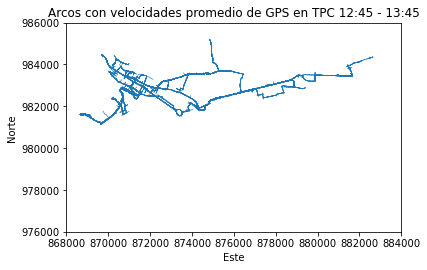

In [337]:
spatial_join_final.plot()
plt.xlabel('Este')
plt.ylabel('Norte')
#plt.title('Arcos con velocidades promedio de GPS en TPC 07:15 - 08:15')
plt.title('Arcos con velocidades promedio de GPS en TPC 12:45 - 13:45')
# Set axes

plt.xlim(868000, 884000)
plt.ylim(976000, 986000)
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC7V2.png", dpi = 600)

<AxesSubplot:>

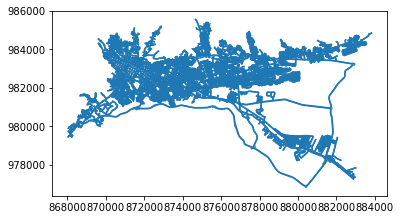

In [85]:
red_actual_veh.plot()

In [47]:
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Redes_GIS/Red_vial_modo_Ibague_vel/Carro_vel.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Redes_GIS/Red_vial_modo_Ibague_vel_prub/Carro_vel.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/TPC/pico1.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Bici/pico4.shp")
red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Bici/BicFP1.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Carro/pico3.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Carro/pico4.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Carro/valle1.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/TPC/valle2.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Carro/valle3.shp")
#red_actual_veh.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Carro/valle4.shp")

Continua en 07c-Analisis_velocidad_horario.ipynb donde se distinguiran las velocidades segun el horario

In [48]:
red_actual_veh.columns

Index(['DIR', 'NOMENCLATU', 'CATEGORIA', 'NOMEN', 'JER_POT', 'JER_PMMEP',
       'Long_KM', 'Shape_Leng', 'angulo1', 'angulo2', 'slope', 'geometry',
       'FID', 'velocity_k'],
      dtype='object')